In [1]:

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from keras.optimizers import Adam


2024-03-25 19:34:18.217771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 19:34:18.217927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 19:34:18.387984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.describe()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [15]:
data.drop_duplicates(subset = None, keep = "first", inplace = True, ignore_index = True)

In [19]:
current_rows = len(data)


current_shape = data.shape
print(f"Number of rows after deduplication: {current_rows}")
print(f"Current shape of DataFrame: {current_shape}")

Number of rows after deduplication: 283726
Current shape of DataFrame: (283726, 31)


In [20]:
data["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
corr = data.corr().round(2)
print("Correlation Matrix:")
print(corr)

plt.figure(figsize=(14, 10))

sns.set(font_scale=1)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()


plt.show()

Correlation Matrix:
        Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...   V21  \
Time    1.00  0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.09 -0.04 -0.01  ...  0.05   
V1      0.12  1.00  0.01 -0.01  0.00 -0.01  0.00 -0.01 -0.00  0.00  ...  0.00   
V2     -0.01  0.01  1.00  0.01 -0.00  0.01 -0.00  0.01  0.00 -0.00  ... -0.00   
V3     -0.42 -0.01  0.01  1.00  0.00 -0.01 -0.00 -0.01 -0.00 -0.00  ...  0.00   
V4     -0.11  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00  0.00  ... -0.00   
V5      0.17 -0.01  0.01 -0.01  0.00  1.00 -0.00 -0.01  0.00 -0.00  ...  0.00   
V6     -0.06  0.00 -0.00 -0.00 -0.00 -0.00  1.00  0.00  0.00 -0.00  ... -0.00   
V7      0.09 -0.01  0.01 -0.01  0.00 -0.01  0.00  1.00 -0.01 -0.00  ...  0.01   
V8     -0.04 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.01  1.00  0.00  ...  0.02   
V9     -0.01  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00  1.00  ...  0.00   
V10     0.03  0.00  0.00 -0.01  0.00 -0.01 -0.00 -0.01  0.00 -0.01  ...  0.00   
V11    -

/tmp/ipykernel_33/194032195.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 0]['Time'], label='Legitimate', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/194032195.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 1]['Time'], label='Fraudulent', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

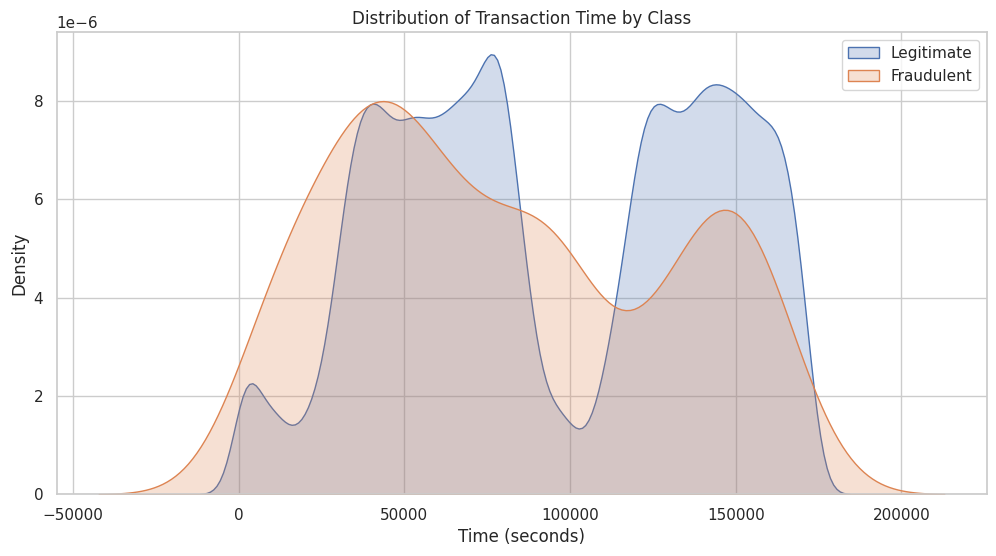

/tmp/ipykernel_33/194032195.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 0]['Amount'], label='Legitimate', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/194032195.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 1]['Amount'], label='Fraudulent', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

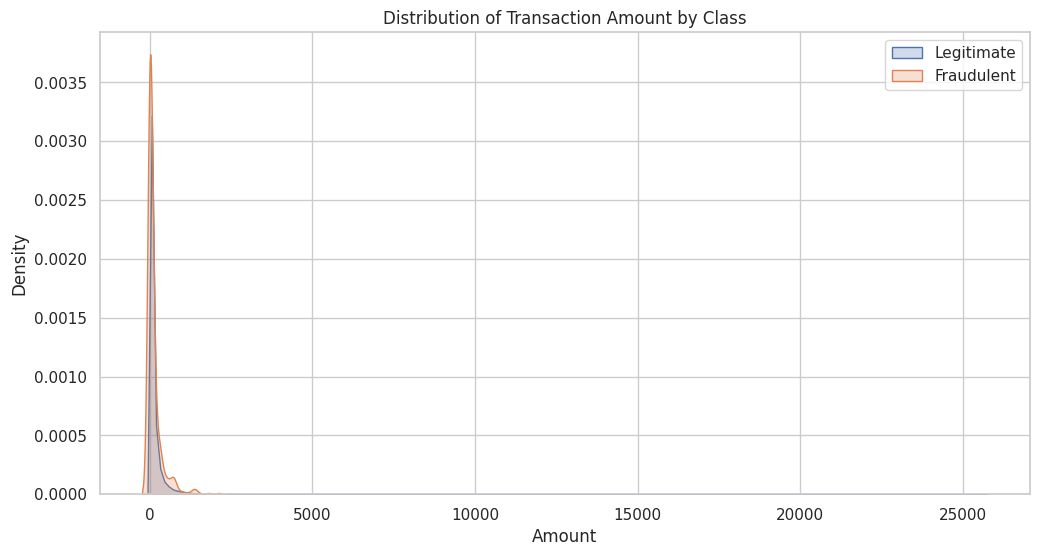

In [22]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.kdeplot(data=data[data['Class'] == 0]['Time'], label='Legitimate', shade=True)
sns.kdeplot(data=data[data['Class'] == 1]['Time'], label='Fraudulent', shade=True)
plt.title('Distribution of Transaction Time by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.kdeplot(data=data[data['Class'] == 0]['Amount'], label='Legitimate', shade=True)
sns.kdeplot(data=data[data['Class'] == 1]['Amount'], label='Fraudulent', shade=True)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

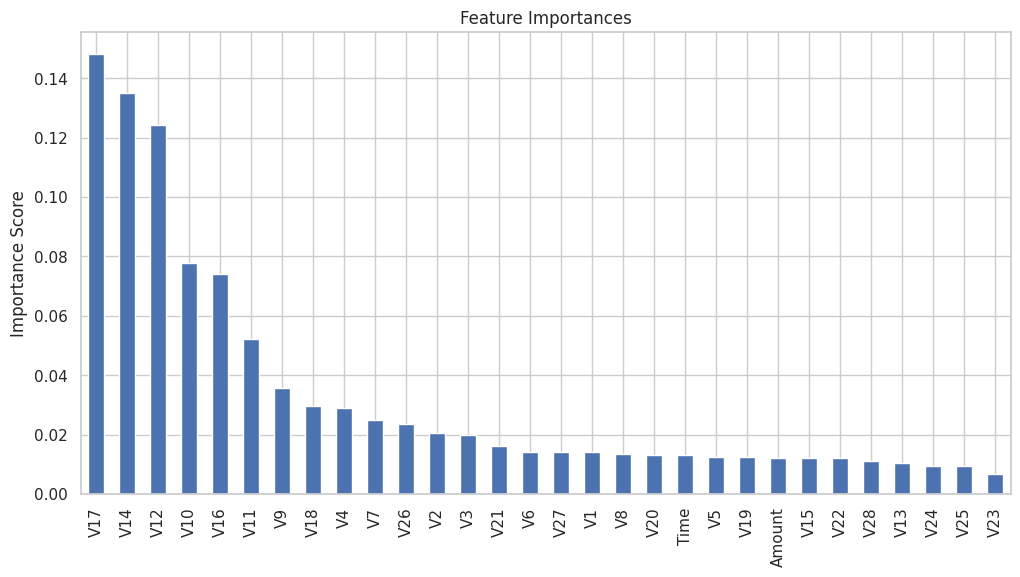

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)  
y = data['Class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()

In [24]:

features_to_drop = [ 'Time', 'V5', 'V19', 'Amount', 'V15', 'V22', 'V28', 'V13', 'V24', 'V25', 'V23']

data_dropped = data.drop(features_to_drop, axis=1)

data_dropped.head()

,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V20,V21,V26,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.251412,-0.018307,-0.189115,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.069083,-0.225775,0.125895,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.524980,0.247998,-0.139097,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.208038,-0.108300,-0.221929,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.408542,-0.009431,0.502292,0.219422,0


In [25]:
X = data_dropped.drop('Class', axis=1)
y = data_dropped['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (226980, 19)
X_test shape: (56746, 19)
y_train shape: (226980,)
y_test shape: (56746,)


In [26]:

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

n_estimators_list = [10, 25, 100, 200]  
contamination_value = 0.02  
for n_trees in n_estimators_list:
    iso_forest = IsolationForest(n_estimators=n_trees, contamination=contamination_value, random_state=42)
    iso_forest.fit(X_train)
    
    test_scores = iso_forest.decision_function(X_test)
    
    test_scores_inverted = -test_scores
    
    test_predictions = iso_forest.predict(X_test)
    test_binary_predictions = np.where(test_predictions == -1, 1, 0)  
    
    precision, recall, _ = precision_recall_curve(y_test, test_scores_inverted)
    
    
    auprc = auc(recall, precision)
    
    print(f"Number of trees: {n_trees}, Contamination: {contamination_value}")
    print(confusion_matrix(y_test, test_binary_predictions))
    print(classification_report(y_test, test_binary_predictions))
    print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of trees: 10, Contamination: 0.02
[[55560  1091]
 [   31    64]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.67      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.83      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Area Under the Precision-Recall Curve (AUPRC): 0.2600


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of trees: 25, Contamination: 0.02
[[55544  1107]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.76      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.87      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Area Under the Precision-Recall Curve (AUPRC): 0.3138


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of trees: 100, Contamination: 0.02
[[55571  1080]
 [   21    74]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.78      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.88      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Area Under the Precision-Recall Curve (AUPRC): 0.2004


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of trees: 200, Contamination: 0.02
[[55559  1092]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.79      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Area Under the Precision-Recall Curve (AUPRC): 0.1976


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

learning_rates = [0.001, 0.0001, 0.00001]
threshold_percentiles = [88, 92, 97]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for lr in learning_rates:
    
    input_dim = X_train_scaled.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

    
    autoencoder.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=256, shuffle=True, validation_split=0.2)

    
    reconstructed = autoencoder.predict(X_test_scaled)

   
    mse = np.mean(np.square(X_test_scaled - reconstructed), axis=1)

    
    for percentile in threshold_percentiles:
        
        threshold = np.percentile(mse, percentile)

        
        anomalies = mse > threshold

        
        print(f"Results for learning rate: {lr} and threshold percentile: {percentile}")
        print(confusion_matrix(y_test, anomalies))
        print(classification_report(y_test, anomalies))


Epoch 1/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8625 - val_loss: 0.7171
Epoch 2/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6822 - val_loss: 0.7106
Epoch 3/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6964 - val_loss: 0.7091
Epoch 4/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6720 - val_loss: 0.7089
Epoch 5/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6816 - val_loss: 0.7078
Epoch 6/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6726 - val_loss: 0.7074
Epoch 7/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6747 - val_loss: 0.7072
Epoch 8/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6789 - val_loss: 0.7070
Epoch 9/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6773 - val_loss: 0.7069
Epoch 10/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6679 - val_loss: 0.7070
Epoch 11/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6638 - val_loss: 0.7068
Epoch 12/100
710/710 ━━━━━━━━━━━━━━━━━━━━